In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [2]:
##loading the dataset
df = pd.read_csv('loan_data.csv')

In [3]:
#data reading 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
223801,359214,0,Cash loans,F,N,N,0,193500.0,745429.5,39712.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
60491,170135,0,Cash loans,M,Y,Y,0,135000.0,477000.0,20340.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
170414,297511,0,Cash loans,F,Y,N,1,135000.0,819432.0,29160.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
260790,401800,0,Revolving loans,M,Y,Y,1,180000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
62844,172892,0,Cash loans,F,N,N,0,135000.0,1752039.0,46345.5,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0
212288,346009,0,Cash loans,F,N,N,1,135000.0,701730.0,66757.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
75056,187046,0,Cash loans,F,N,Y,0,112500.0,450000.0,21109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
269556,412386,0,Cash loans,F,Y,Y,1,180000.0,986553.0,28975.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,3.0
132297,253448,0,Cash loans,M,Y,Y,0,202500.0,1170000.0,32305.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
235578,372872,0,Cash loans,F,N,Y,0,67500.0,90000.0,9351.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
##checking for null values
print(df.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le

# Identify numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Fill missing values with median
for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

# Verify the changes
print(df.isnull().sum())
print(df.head())



SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64
   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
default_percentage = df['TARGET'].value_counts(normalize=True) * 100
print(default_percentage)


TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


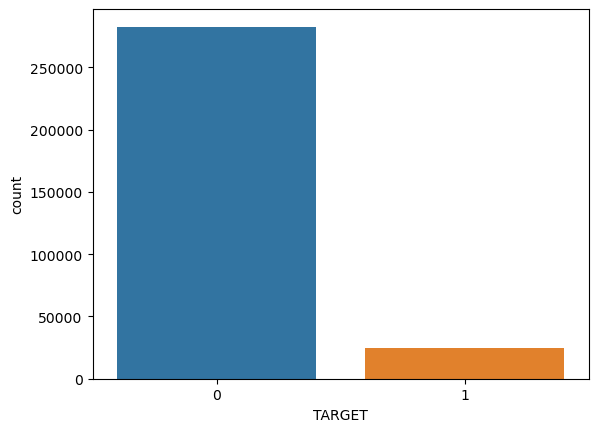

In [11]:
#visualizing class imbalance
sns.countplot(x='TARGET', data=df)
plt.show()


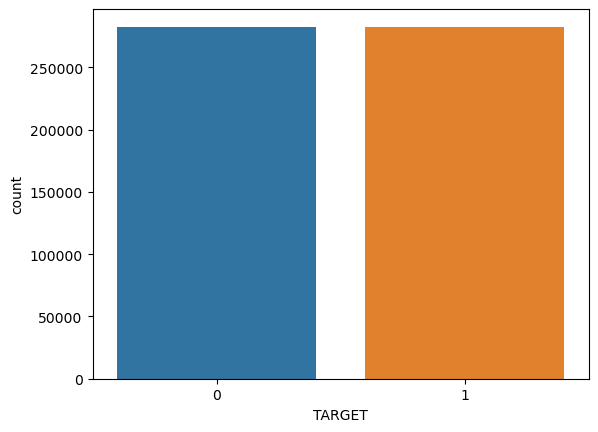

In [17]:
#handling imbalanced data
X = df.drop('TARGET', axis=1)
y = df['TARGET']

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

sns.countplot(x=y_res)
plt.show()


In [19]:
#encoding categorical features
categorical_features = X_res.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False)

X_encoded = pd.DataFrame(encoder.fit_transform(X_res[categorical_features]))
X_encoded.columns = encoder.get_feature_names(categorical_features)

X_res = X_res.drop(categorical_features, axis=1)
X_res = pd.concat([X_res, X_encoded], axis=1)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
#feature scaling
scaler = StandardScaler()
numerical_features = X_res.select_dtypes(include=[np.number]).columns
X_res[numerical_features] = scaler.fit_transform(X_res[numerical_features])


In [22]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)



In [23]:
#building and training the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 376us/step - accuracy: 0.8769 - loss: 0.3042 - val_accuracy: 0.8956 - val_loss: 0.2637
Epoch 2/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 394us/step - accuracy: 0.8768 - loss: 0.3041 - val_accuracy: 0.8957 - val_loss: 0.2651
Epoch 3/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 374us/step - accuracy: 0.8777 - loss: 0.3037 - val_accuracy: 0.8966 - val_loss: 0.2636
Epoch 4/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 379us/step - accuracy: 0.8783 - loss: 0.3020 - val_accuracy: 0.8857 - val_loss: 0.2964
Epoch 5/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 375us/step - accuracy: 0.8784 - loss: 0.3012 - val_accuracy: 0.8964 - val_loss: 0.2647
Epoch 6/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 374us/step - accuracy: 0.8791 - loss: 0.3014 - val_accuracy: 0.8962 - val_loss: 0.2620
Epoch 7/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 378us/step - accuracy: 0.8792 - loss: 0.2997 - val_accuracy: 0.8254 - val_loss: 0.3801
Epoch 8/50
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 4s 375us/step - ac

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 1s 205us/step
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     56538
           1       0.96      0.84      0.89     56537

    accuracy                           0.90    113075
   macro avg       0.91      0.90      0.90    113075
weighted avg       0.91      0.90      0.90    113075

ROC AUC Score: 0.9568110220120376


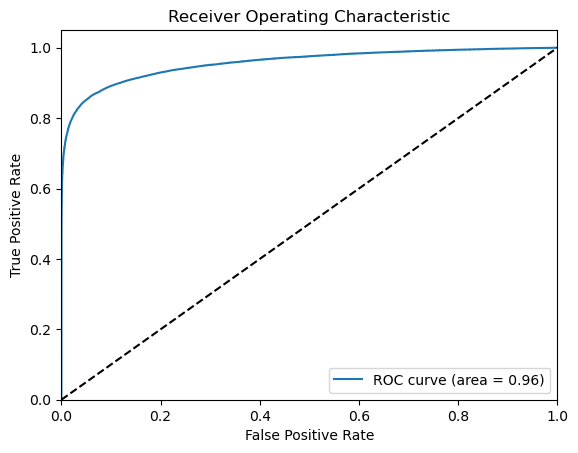

In [27]:
##evaluating the model
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [28]:
##calculating the sensitivity
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
print('Sensitivity:', sensitivity)


Sensitivity: 0.8361427030086492


In [29]:
#saving the model
model.save('loan_default_prediction_model.h5')
